<a href="https://colab.research.google.com/github/Jessicantma/MidtermTask/blob/main/MidtermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PyTorch (if not already available) and required libraries
!pip install torch torchvision torchaudio
!pip install opencv-python-headless  # for video processing
!pip install pyyaml matplotlib  # additional dependencies for YOLO

# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install YOLOv5 requirements
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import cv2

# Define the video path
video_path = '/content/drive/MyDrive/Yolo_videos/sample_video.mp4'

# Open video using OpenCV
video = cv2.VideoCapture(video_path)


In [4]:
import torch

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 106MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


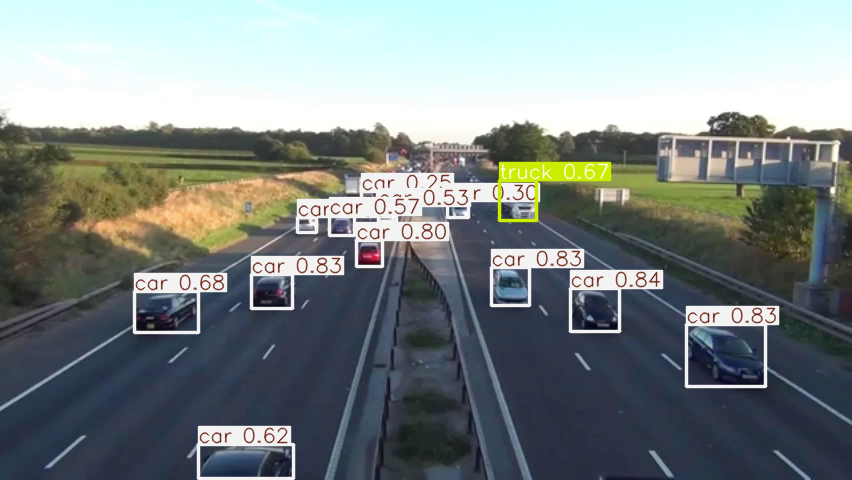

Saved 1 image to output_image


In [5]:
# Process only the first frame that meets the conditions
frame_interval = 5  # Set to process every 5th frame, adjust as needed
frame_count = 0
image_saved = False  # Flag to ensure only one image is saved

while video.isOpened() and not image_saved:
    ret, frame = video.read()
    if not ret:
        break

    # Only process every 5th frame
    if frame_count % frame_interval == 0:
        # Convert frame to RGB (YOLO expects RGB format)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform YOLOv5 inference
        results = model(frame_rgb)

        # Display and save results for the first frame only
        results.show()  # Display results
        results.save(save_dir='output_image')  # Save results to 'output_image' folder

        # Set flag to True so only one image is generated
        image_saved = True

    # Increment frame counter
    frame_count += 1


In [6]:
import torch
import cv2
import pandas as pd

# Initialize lists to store detection results
frames_data = []

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Open video
video_path = '/content/drive/MyDrive/Yolo_videos/sample_video.mp4'  # Adjust path as needed
video = cv2.VideoCapture(video_path)

frame_count = 0

# Loop through frames
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break

    # Convert frame to RGB format for YOLO
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform YOLO inference
    results = model(frame_rgb)

    # Process YOLO results
    for obj in results.pred[0]:
        x1, y1, x2, y2, conf, cls = obj  # bounding box coordinates, confidence, and class

        # Append the object information
        frames_data.append({
            'frame': frame_count,
            'x1': int(x1),
            'y1': int(y1),
            'x2': int(x2),
            'y2': int(y2),
            'confidence': float(conf),
            'class': int(cls),
            'label': model.names[int(cls)]  # Get class name
        })

    frame_count += 1

# Convert to a DataFrame for easier manipulation
detection_data = pd.DataFrame(frames_data)


Streaming output truncated to the last 5000 lines.
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/

In [7]:
# Normalize bounding box coordinates based on frame size
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

detection_data['x1_norm'] = detection_data['x1'] / frame_width
detection_data['y1_norm'] = detection_data['y1'] / frame_height
detection_data['x2_norm'] = detection_data['x2'] / frame_width
detection_data['y2_norm'] = detection_data['y2'] / frame_height


In [8]:
# Save the preprocessed data to a CSV file
detection_data.to_csv('/content/drive/MyDrive/Yolo_videos/detection_data.csv', index=False)


In [9]:
!pip install scipy


In [10]:
from scipy.spatial import distance as dist
import numpy as np

# Initialize dictionaries for object centroids and unique IDs
object_centroids = {}
object_id = 0

def track_objects(data):
    global object_id

    # Create an empty list to store tracked objects
    tracked_objects = []

    # Group by frame for processing
    frames = data.groupby('frame')

    for frame_id, frame_data in frames:
        # Initialize a list to store centroids in the current frame
        frame_centroids = []

        # Get centroids of all detected objects in the frame
        for _, row in frame_data.iterrows():
            cx = int((row['x1'] + row['x2']) / 2)
            cy = int((row['y1'] + row['y2']) / 2)
            frame_centroids.append((cx, cy))

        # If there are no existing objects, initialize with the first frame
        if not object_centroids:
            for centroid in frame_centroids:
                object_centroids[object_id] = centroid
                tracked_objects.append((frame_id, object_id, *centroid))
                object_id += 1
            continue

        # Match current frame centroids with previously stored ones
        current_ids = list(object_centroids.keys())
        prev_centroids = list(object_centroids.values())

        # Compute distances and determine new IDs
        D = dist.cdist(np.array(prev_centroids), np.array(frame_centroids))
        rows = D.min(axis=1).argsort()
        cols = D.argmin(axis=1)[rows]

        # Track objects by ID assignment
        used_rows, used_cols = set(), set()
        for row, col in zip(rows, cols):
            if row in used_rows or col in used_cols:
                continue
            if D[row, col] < 50:  # Threshold for matching centroids
                object_id = current_ids[row]
                tracked_objects.append((frame_id, object_id, *frame_centroids[col]))
                used_rows.add(row)
                used_cols.add(col)

        # Register new objects for unmatched centroids
        for col in range(len(frame_centroids)):
            if col not in used_cols:
                object_centroids[object_id] = frame_centroids[col]
                tracked_objects.append((frame_id, object_id, *frame_centroids[col]))
                object_id += 1

    return tracked_objects

# Apply tracking
tracked_data = track_objects(detection_data)


In [11]:
import pandas as pd

# Convert tracked data to a DataFrame
tracked_df = pd.DataFrame(tracked_data, columns=['frame', 'object_id', 'cx', 'cy'])

# Save the tracking data to a CSV file
tracked_df.to_csv('/content/drive/MyDrive/Yolo_videos/tracked_data.csv', index=False)


In [12]:
import torch
import torch.nn as nn


In [13]:
import numpy as np

# Parameters for sequence length
sequence_length = 10  # Adjust this based on desired temporal window
stride = 1  # Overlap between sequences

# Group the data by object ID
object_sequences = {}
for obj_id, group in tracked_df.groupby('object_id'):
    # Collect centroid positions as a temporal sequence
    centroids = group[['cx', 'cy']].values

    # Break into sequences with fixed length
    sequences = []
    for i in range(0, len(centroids) - sequence_length + 1, stride):
        sequences.append(centroids[i:i + sequence_length])

    # Store sequences by object ID
    object_sequences[obj_id] = np.array(sequences)

# Flatten and aggregate all sequences for Transformer input
all_sequences = []
for obj_id, seqs in object_sequences.items():
    all_sequences.extend(seqs)

# Convert to numpy array for easy manipulation
all_sequences = np.array(all_sequences)
print("Shape of all_sequences:", all_sequences.shape)


Shape of all_sequences: (46351, 10, 2)


In [14]:
import torch
import torch.nn as nn

class TransformerEncoderOnlyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_heads, n_layers, output_dim):
        super(TransformerEncoderOnlyModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=n_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Embed the input sequences
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Transform to (seq_len, batch, feature) for Transformer input
        # Forward through Transformer encoder
        transformer_out = self.transformer_encoder(x)
        # Output layer takes last sequence output
        out = self.fc_out(transformer_out[-1])
        return out

# Model parameters
input_dim = 2  # Coordinates (cx, cy)
hidden_dim = 64
n_heads = 4
n_layers = 2
output_dim = 3  # Number of output classes

# Instantiate the model
model = TransformerEncoderOnlyModel(input_dim, hidden_dim, n_heads, n_layers, output_dim)


In [15]:
# Example inference on a new sequence
test_sequence = torch.tensor(all_sequences[0], dtype=torch.float32).unsqueeze(0)  # Single sequence
model.eval()
with torch.no_grad():
    prediction = model(test_sequence)
    print("Predicted Behavior:", prediction.argmax(dim=1).item())


Predicted Behavior: 2


In [16]:
# Example inference on a single sequence
model.eval()
test_sequence = torch.tensor(all_sequences[0], dtype=torch.float32).unsqueeze(0)  # Add batch dimension

with torch.no_grad():
    prediction = model(test_sequence)
    predicted_label = prediction.argmax(dim=1).item()
    print("Predicted Behavior Label:", predicted_label)


Predicted Behavior Label: 2


In [17]:
# Split data into train and test sets (if not done already)
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 80% train and 20% test split
num_train = int(0.8 * len(all_sequences))
X_test = torch.tensor(all_sequences[num_train:], dtype=torch.float32)
y_test = torch.randint(0, output_dim, (X_test.shape[0],))  # Replace with actual labels if available

# Run predictions on test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    predicted_labels = test_predictions.argmax(dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.332110883399849
Precision: 0.2191454581371198
Recall: 0.332110883399849
